# Imports

In [1]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# For text preprocessing
import nltk
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# Metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay


# For pipeline
from sklearn.pipeline import Pipeline

# Classification algorithms
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn import tree

# Reading the Data and Preprocessing

In [2]:
data = pd.read_csv("Constraint_English_Train - Sheet1.csv")
val = pd.read_csv("Constraint_English_Val - Sheet1.csv")
test = pd.read_csv("english_test_with_labels - Sheet1.csv")

In [3]:
data.head()

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real


In [4]:
print(f"Number of training samples: {len(data)}")
print(f"Number of validation samples: {len(val)}")
print(f"Number of testing samples: {len(test)}")

Number of training samples: 6420
Number of validation samples: 2140
Number of testing samples: 2140


<AxesSubplot:>

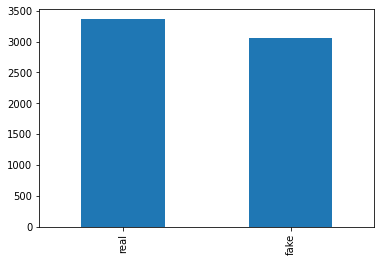

In [5]:
# Distribution of the training dataset
data['label'].value_counts().plot(kind='bar')

In [6]:
# Frequent words in the English language which would not aid classification
stop_words = set(stopwords.words("english"))

def process_text(string):
    """
    Replaces "http", "www" in urls with space.
    Replaces ampersand(&) with "and"
    Removes non-alphanumeric characters
    Removes stop words
    """
    text = string.lower().split()
    text = " ".join(text)
    text = re.sub(r"http(\S)+",' ',text)    
    text = re.sub(r"www(\S)+",' ',text)
    text = re.sub(r"&",' and ',text)  
    tx = text.replace('&amp',' ')
    text = re.sub(r"[^0-9a-zA-Z]+",' ',text)
    text = text.split()
    text = [w for w in text if not w in stop_words]
    text = " ".join(text)
    return text

In [7]:
data['tweet'] = data['tweet'].apply(lambda x: process_text(x))
val['tweet'] = val['tweet'].apply(lambda x: process_text(x))
test['tweet'] = test['tweet'].apply(lambda x: process_text(x))

# Building the Classification Pipeline

In the pipeline, every sample will first be tokenized using CountVectorizer. Hence the collection of samples will be represented as a matrix of token counts. Then, this count matrix will be transformed to a normalized tf-idf representation. The goal of using tf-idf instead of the raw frequencies of occurrence of a token in a given document is to scale down the impact of tokens that occur very frequently in a given corpus and that are hence empirically less informative than features that occur in a small fraction of the training corpus. The tf-idf representation is then passed to a classification algorithm. Each algorithm and the corresponding result is shown in subsections that follow.

## SVM

In [8]:
pipeline = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c', LinearSVC())
    ])

# Training
pipeline.fit(data['tweet'], data['label'])

# Predictions on the validation set
val_preds = pipeline.predict(val['tweet'])

In [9]:
print(classification_report(val['label'], val_preds))

              precision    recall  f1-score   support

        fake       0.92      0.94      0.93      1020
        real       0.95      0.93      0.94      1120

    accuracy                           0.93      2140
   macro avg       0.93      0.94      0.93      2140
weighted avg       0.93      0.93      0.93      2140



Confusion Matrix of SVM predictions on Validation Data


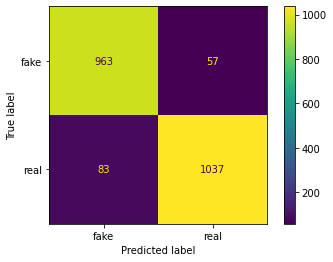

In [10]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix

title="Confusion Matrix of SVM predictions on Validation Data"
disp = ConfusionMatrixDisplay(confusion_matrix(val['label'],val_preds), display_labels=["fake", "real"])

print(title)
disp.plot()

plt.show()

## Logistic Regression

In [11]:
pipeline = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c', LogisticRegression())
    ])

# Training
pipeline.fit(data['tweet'], data['label'])

# Predictions on the validation set
val_preds = pipeline.predict(val['tweet'])

In [12]:
print(classification_report(val['label'], val_preds))

              precision    recall  f1-score   support

        fake       0.91      0.94      0.93      1020
        real       0.94      0.92      0.93      1120

    accuracy                           0.93      2140
   macro avg       0.93      0.93      0.93      2140
weighted avg       0.93      0.93      0.93      2140



Confusion Matrix of Logistic Regression predictions on Validation Data


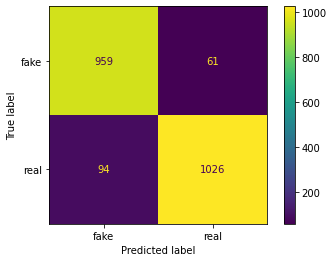

In [13]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix

title="Confusion Matrix of Logistic Regression predictions on Validation Data"
disp = ConfusionMatrixDisplay(confusion_matrix(val['label'],val_preds), display_labels=["fake", "real"])

print(title)
disp.plot()

plt.show()

## Decision Trees

In [14]:
pipeline = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c', tree.DecisionTreeClassifier())
    ])

# Training
pipeline.fit(data['tweet'], data['label'])

# Predictions on the validation set
val_preds = pipeline.predict(val['tweet'])

In [15]:
print(classification_report(val['label'], val_preds))

              precision    recall  f1-score   support

        fake       0.85      0.83      0.84      1020
        real       0.85      0.87      0.86      1120

    accuracy                           0.85      2140
   macro avg       0.85      0.85      0.85      2140
weighted avg       0.85      0.85      0.85      2140



Confusion Matrix of Decision Trees predictions on Validation Data


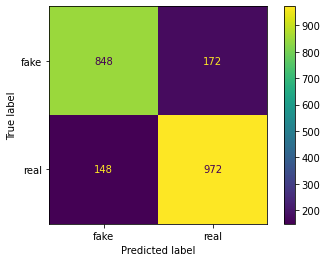

In [16]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix

title="Confusion Matrix of Decision Trees predictions on Validation Data"
disp = ConfusionMatrixDisplay(confusion_matrix(val['label'],val_preds), display_labels=["fake", "real"])

print(title)
disp.plot()

plt.show()

## Random Forests

In [17]:
pipeline = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c', RandomForestClassifier())
    ])

# Training
pipeline.fit(data['tweet'], data['label'])

# Predictions on the validation set
val_preds = pipeline.predict(val['tweet'])

In [18]:
print(classification_report(val['label'], val_preds))

              precision    recall  f1-score   support

        fake       0.89      0.93      0.91      1020
        real       0.93      0.89      0.91      1120

    accuracy                           0.91      2140
   macro avg       0.91      0.91      0.91      2140
weighted avg       0.91      0.91      0.91      2140



Confusion Matrix of Random Forest predictions on Validation Data


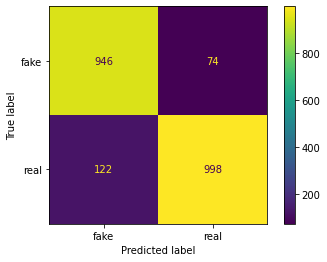

In [19]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix

title="Confusion Matrix of Random Forest predictions on Validation Data"
disp = ConfusionMatrixDisplay(confusion_matrix(val['label'],val_preds), display_labels=["fake", "real"])

print(title)
disp.plot()

plt.show()

## Gradient Boosting Classifier

In [20]:
pipeline = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c', GradientBoostingClassifier())
    ])

# Training
pipeline.fit(data['tweet'], data['label'])

# Predictions on the validation set
val_preds = pipeline.predict(val['tweet'])

In [21]:
print(classification_report(val['label'], val_preds))

              precision    recall  f1-score   support

        fake       0.84      0.90      0.87      1020
        real       0.91      0.84      0.87      1120

    accuracy                           0.87      2140
   macro avg       0.87      0.87      0.87      2140
weighted avg       0.87      0.87      0.87      2140



Confusion Matrix of Gradient Boosting Classifier predictions on Validation Data


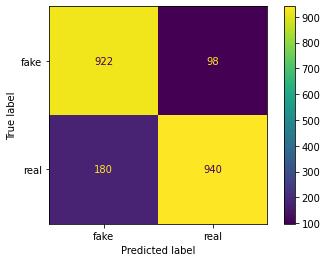

In [22]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix

title="Confusion Matrix of Gradient Boosting Classifier predictions on Validation Data"
disp = ConfusionMatrixDisplay(confusion_matrix(val['label'],val_preds), display_labels=["fake", "real"])

print(title)
disp.plot()

plt.show()